Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [124]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [47]:
data_titanic = pd.read_csv('data/train.csv')
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

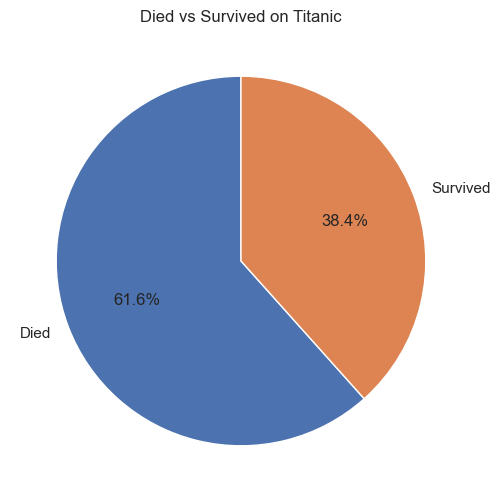

In [113]:
survived_counts = data_titanic['Survived'].value_counts()
labels = ['Died', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle = 90)
plt.title('Died vs Survived on Titanic')
plt.show()

по візуалізації видно, що загинувших на кораблі (приблизно в 1.6 рази) більше ніж виживших.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


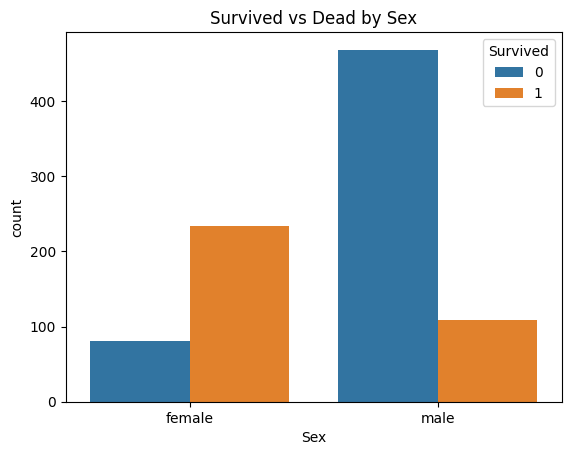

<Figure size 1000x600 with 0 Axes>

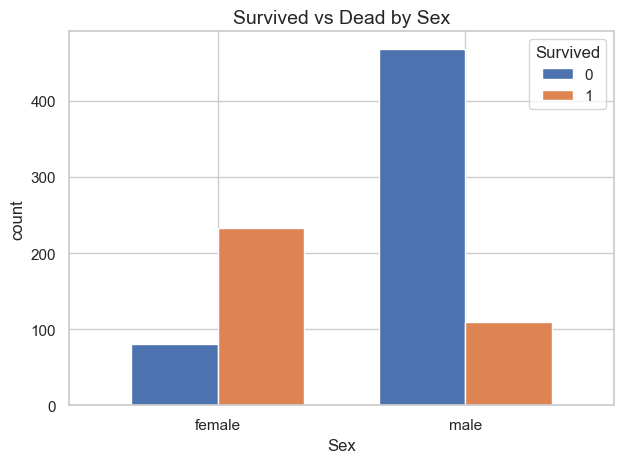

In [136]:
survival_count = data_titanic.groupby(['Sex', 'Survived'], as_index=False).size()

survival_data = pd.crosstab(data_titanic['Sex'], data_titanic['Survived'])

plt.figure(figsize=(10, 6))
survival_data.plot(kind='bar', width=0.7)

plt.title('Survived vs Dead by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(title='Survived')
plt.xticks(rotation=0)

plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

видно, що вижило набагато більше жінок, ніж чоловіків, отже є кореляція між статтю та шансом вижити. 

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

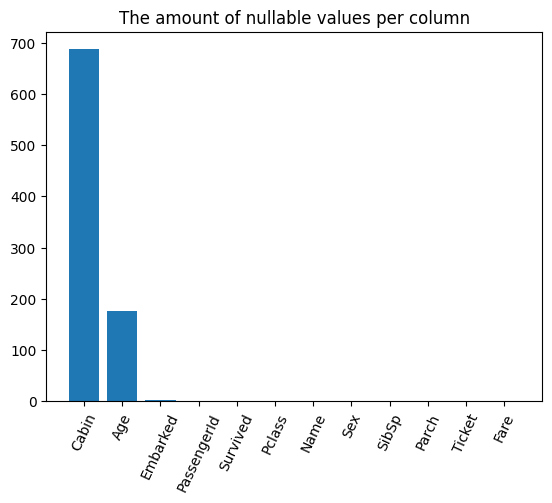

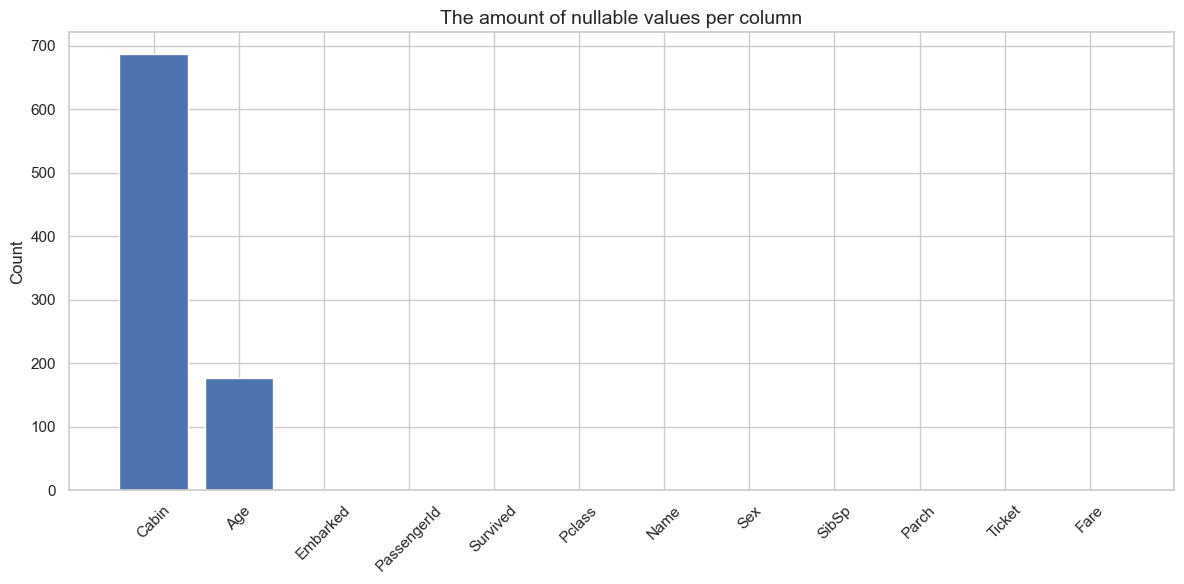

In [89]:
missing_values = data_titanic.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(missing_values.index, missing_values.values)

plt.title('The amount of nullable values per column', fontsize=14)
plt.xticks(rotation=45)  
plt.ylabel('Count')
plt.tight_layout()
plt.show()

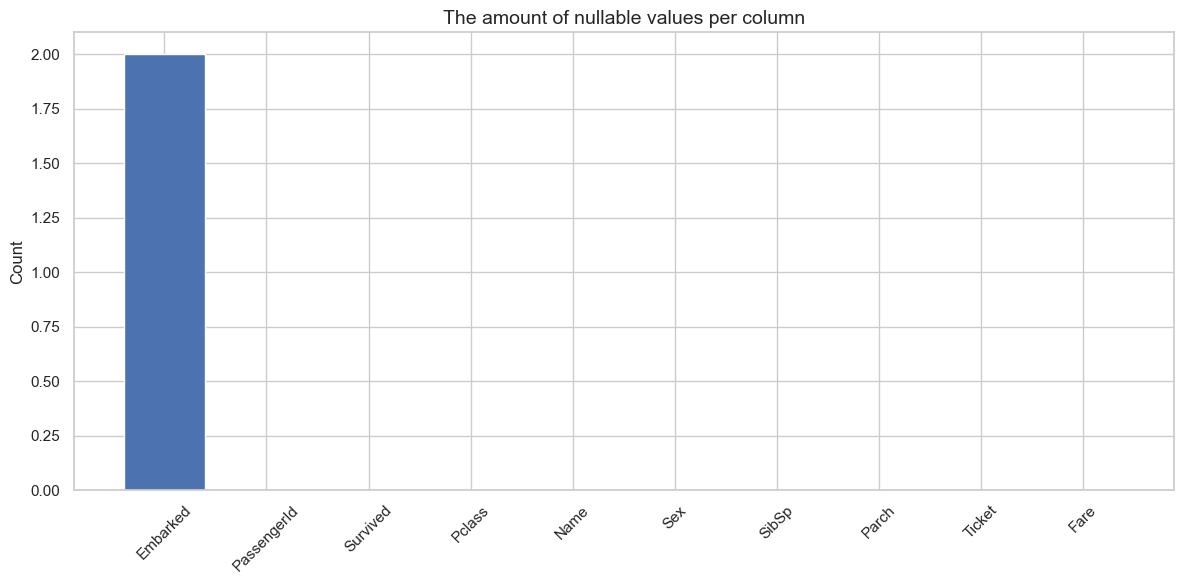

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(missing_values[2:].index, missing_values[2:].values)

plt.title('The amount of nullable values per column', fontsize=14)
plt.xticks(rotation=45)  
plt.ylabel('Count')
plt.tight_layout()
plt.show()

колонка `cabin` має найбільшу кількість пропущених значень (680-690), можливо інформацію про кабінки не було задокументована або втрачена на кораюді колонка з віком `age` також маж дстатньо багато (до 180) пропущених значень. `embarked` має зовсім трохи втрачених значень, що не є значним. всі інші колонки не мають пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

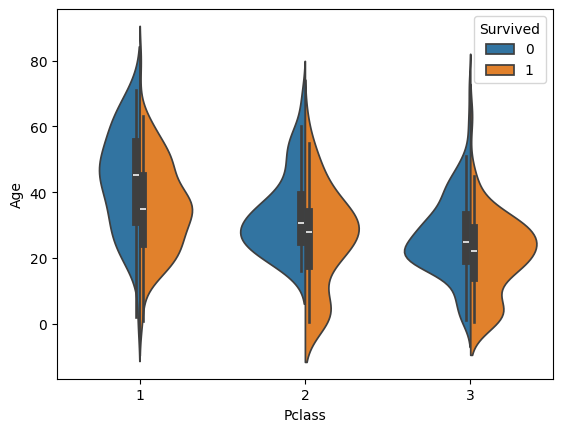

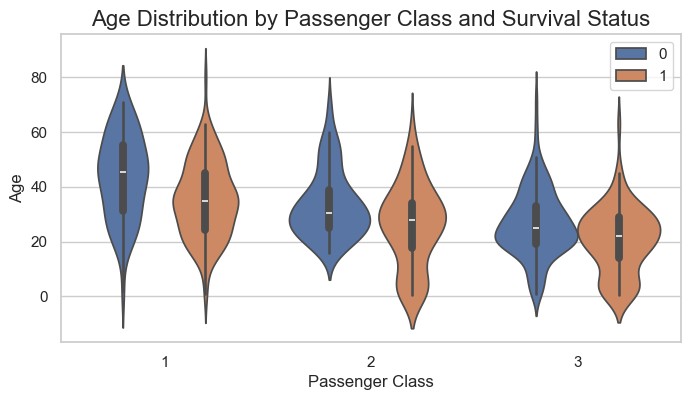

In [119]:
plt.figure(figsize=(8, 4))
sns.set_style('whitegrid')

ax = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data_titanic, 
                   split=False, inner='box')

plt.title('Age Distribution by Passenger Class and Survival Status', fontsize=16)
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.legend(loc='upper right')

plt.show()

цей графік відображає розподіл віку пасажирів Титаніка в залежності від класу квитка та статусу виживання.
кожна скрипка відображає розподіл віку: синій - пасажири що не вижили, померанчевий - вижили, ширина скрипки в кожній точці  показує частоту пасажирів якогось віку.
всередині скрипки є медіана (біла точка), IQR, діапазон між Q1 і Q3, - прямокутник, та діапазон всіх значеня - лінія.
з графіка видно, що у першому класі виживали переважно пасажири старшоо віку. у другому класі розподіл віку - це загалом середина діапазону. у третьому класі вижило більше молодих пасажирів. загалом медіанний вік виживших у третьому класі набагато нижчий, ніж в інших. 20-40 років - більше пасажирів такого віку вижили.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


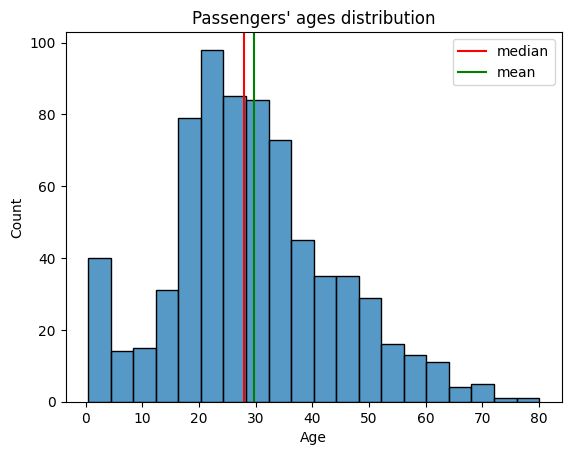

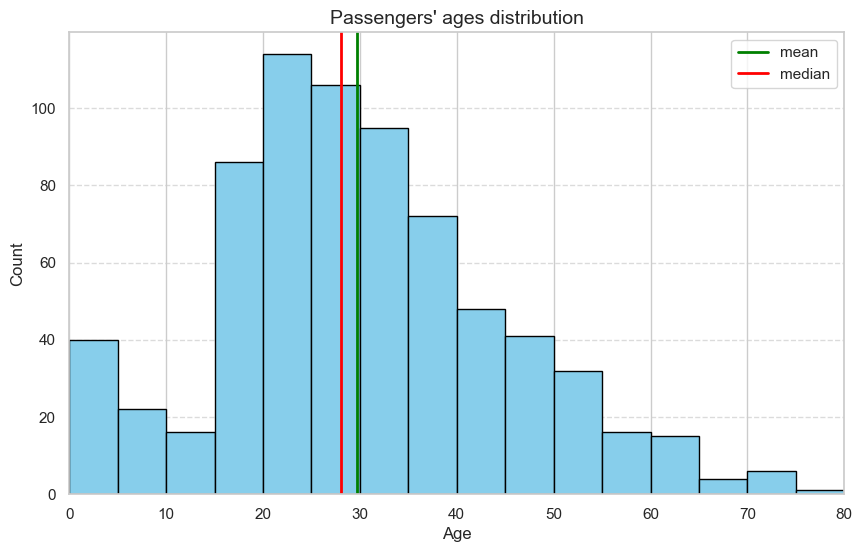

In [128]:
ages = data_titanic['Age'].dropna()
mean_age = ages.mean()
median_age = ages.median()

plt.figure(figsize=(10, 6))

plt.hist(ages, bins=np.arange(0, 85, 5), color='skyblue', edgecolor='black')

plt.axvline(mean_age, color='green', linestyle='-', linewidth=2, label='mean')
plt.axvline(median_age, color='red', linestyle='-', linewidth=2, label='median')

plt.title("Passengers' ages distribution", fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend()

plt.xlim(0, 80)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

блакитні стовпці - кількість пасажирів у кожній віковій категорії. червона лінія - медіанний вік, зелена лінія - середній вік.
найбільша кількість пасажирів були у віці 20-30 років, є досить багато людей (0-5). середній та медіанний вік дуже близькі, тому це майже нормальний розподіл. 
також кількість пасажирів старше 60 років відносно невелика..

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Який вплив на виживання мали молодші пасажири, порівняно з літніми пасажирами, і як це залежало від класу?

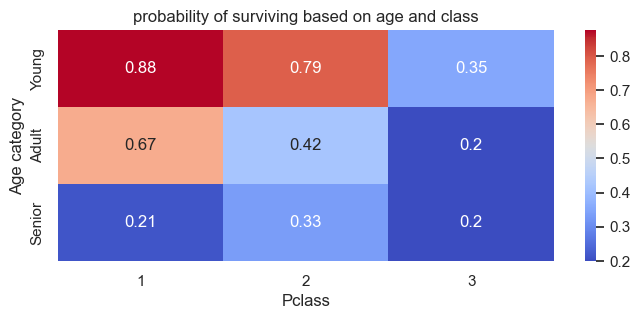

In [170]:
data_titanic['age_group'] = pd.cut(data_titanic['Age'], bins=[0, 18, 60, 100], labels=['Young', 'Adult', 'Senior'])

survival_by_age_class = data_titanic.groupby(['age_group', 'Pclass'], observed=True)['Survived'].mean().unstack()

plt.figure(figsize=(8, 3))
sns.heatmap(survival_by_age_class, annot=True, cmap='coolwarm', cbar=True)
plt.title('probability of surviving based on age and class')
plt.xlabel('Pclass')
plt.ylabel('Age category')
plt.show()

heatmap показує ймовірність вижити в залежності від вікової категорії та класу. найвища ймовірність виживання була у молодих пасажирів 1-го класу, багаті діти були в пріоритеті. молодь з 2 класу також в більшості була врятована. дорослі (18-60) виживали в залежності від класу, 1 клас мав високу ймовірність (0.67), 2 трохи менше (0.42), а 3 клас майже не вижив (0.2). щодо старших пасажирів, то більше шансів було о представників 2 класу, проте показники схожі у всіх класах. можливо, це через те, що їм було фізично важко евакуюватись.
висновки: клас має вплив на шанс вижити, але і вік важливий. 1 і 2 к

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

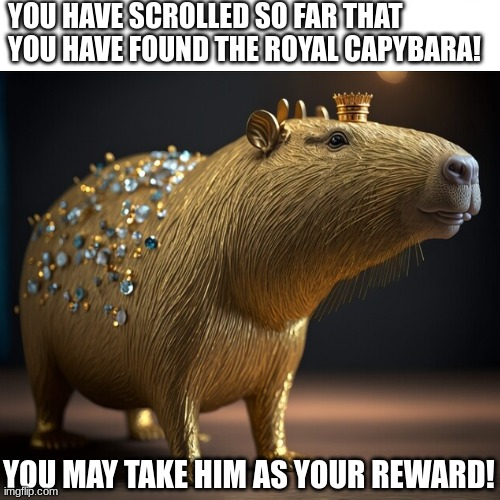